In [8]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:

from toy_models_of_superposition.models import Model, Config
from toy_models_of_superposition.optimize import optimize	
from toy_models_of_superposition.figures import plot_intro_diagram, render_features
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

config = Config(
    n_features = 5,
    n_hidden = 2,
    n_instances = 10,
)

model = Model(
    config=config,
    device=DEVICE,
    # Exponential feature importance curve from 1 to 1/100
    importance = (0.9**torch.arange(config.n_features))[None, :],
    # Sweep feature frequency across the instances from 1 (fully dense) to 1/20
    feature_probability = (20 ** -torch.linspace(0, 1, config.n_instances))[:, None]
)
optimize(model, config)

  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 

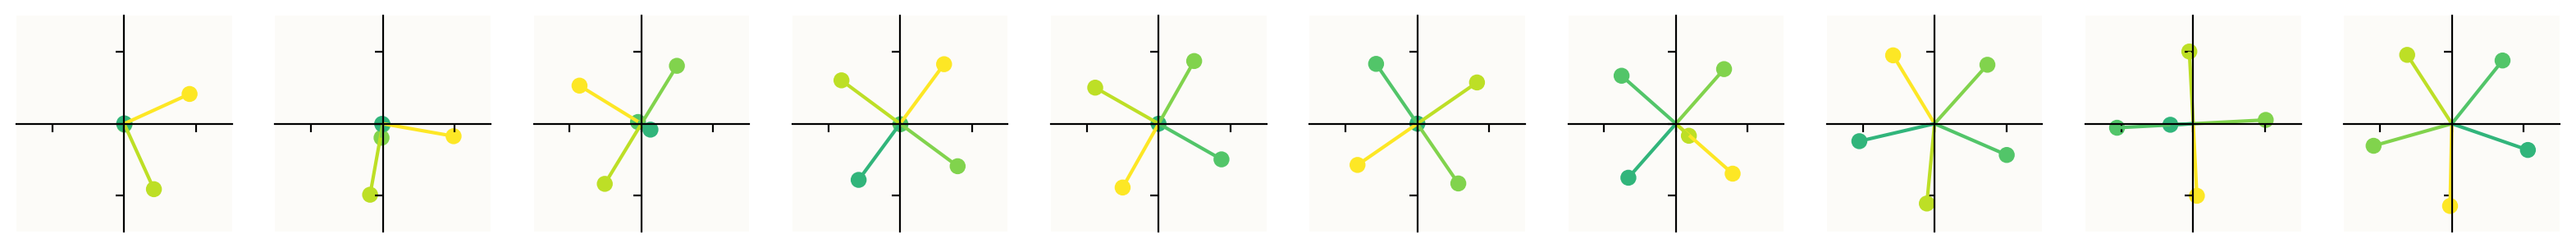

In [5]:
plot_intro_diagram(model)

In [6]:
import numpy as np
render_features(model, which=np.s_[:], to_sort=False)

In [7]:
from toy_models_of_superposition.figures import dimensionality_figure
dimensionality_figure(model)